## Read data

In [62]:
import pandas as pd
#to read the csv file using pandas library
data = pd.read_csv('Life_Expectancy_Data.csv') 

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [45]:
#to get all the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

# Visualize the data

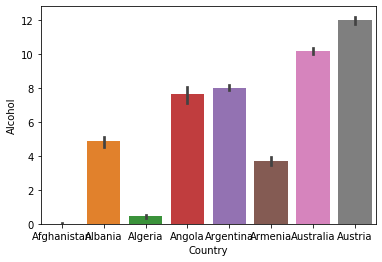

In [208]:
import seaborn as sns
#using bar plot visualizing the x axis as Country and y axis as Alcohol to see the correlation
sns.barplot(x='Country', y='Alcohol', data=data.iloc[:100])
#I didn't use all the values because the graph wouldnt look good so i used iloc 

<BarContainer object of 100 artists>

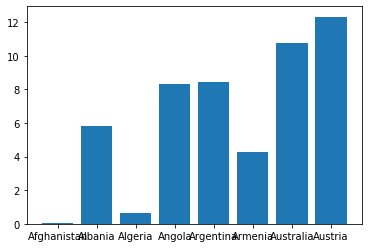

In [212]:
import matplotlib.pyplot as plt
#i used bar plot the see Country and Alcohol values
plt.bar(data.iloc[:100]['Country'], data.iloc[:100]['Alcohol'])

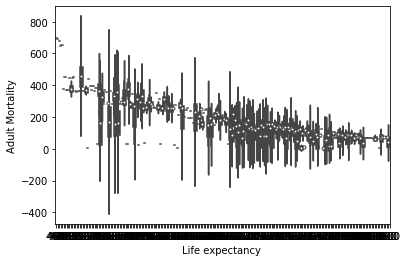

In [224]:
sns.violinplot(x='Life expectancy ', y='Adult Mortality', data=data.iloc[:500])
#i used violin plot for the life expectancy and adult mortality correlation

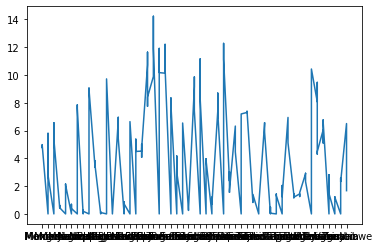

In [215]:
# i used line plotting 
plt.plot(data.iloc[1000:]['Country'].values, data.iloc[1000:]['Alcohol'].values)

#creating a heatmap to see the correlation between all the values
corr = data.corr()sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

# Preprocessing

In [46]:
#to see if there are any null values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [47]:
data = data.dropna()  
#to drop if there is any missing values

In [48]:
data.isnull().sum()
#all missing values are gone

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [97]:
#splitting the data into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)


# Training the data

# Linear Regression 

In [196]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
x = data.GDP.values.reshape(-1,1)
y = data['percentage expenditure'].values.reshape(-1,1)          
#train the model
linear_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
b0 = linear_reg.predict(([[10000]])) #predict the next 10000 value       
print("b0: ", b0)

b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[1351.02549826]]
b1:  [[0.14705833]]


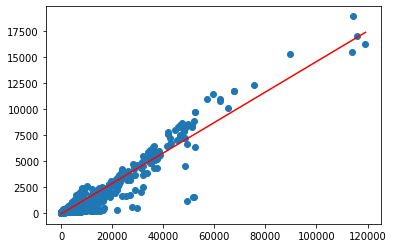

Mean Absolute Error:  50943.94783778521
Mean Squared Error:  3456291221.6604424
Root Mean Squared Error:  58790.23066514063


In [198]:
import numpy as np
x_array = np.arange(min(data.GDP),max(data.GDP)).reshape(-1,1) 

plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                 
plt.plot(x_array,y_head,color="red")
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [199]:
from sklearn.metrics import mean_squared_error, r2_score 
print(r2_score(y, linear_reg.predict(x)))
#which means the accuracy is %92

0.920254296978608


# Decision Tree 

In [115]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [116]:
data2 = pd.read_csv('Life_Expectancy_Data.csv') 

In [117]:
data2 = data2.dropna()  

In [174]:
x = data2['Life expectancy '].values.reshape(-1,1)
y = data2['Schooling'].values.reshape(-1,1)   

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
DT_reg = DecisionTreeRegressor()           
DT_reg.fit(x_train,y_train) #fit the model                 

print(DT_reg.predict(x)) 

[10.85        8.775       8.775      ... 10.35        9.56666667
 10.43333333]


In [176]:
print(r2_score(y, DT_reg.predict(x)))
#the accuracy is %65 which is pretty low which means Decision Tree is not the best option for this

0.6545977790457844


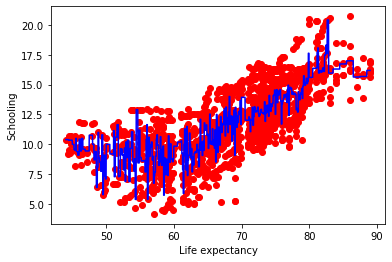

In [177]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   
y_head = DT_reg.predict(x_array)                        

plt.scatter(x,y, color="red")
plt.plot(x_array,y_head,color="blue")
plt.xlabel("Life expectancy")
plt.ylabel("Schooling")
plt.show()

# Logistic Regression

In [179]:
data3 = pd.read_csv('Life_Expectancy_Data.csv') 

In [180]:
data3 = data3.dropna() 

In [181]:
data3.drop(["Country"], axis=1, inplace=True)  
data3.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [182]:
data3["Status"].value_counts()
#to see how many countries are developing or developed

Developing    1407
Developed      242
Name: Status, dtype: int64

In [183]:
data3.Status = [1 if each == "Developing" else 0 for each in data3.Status]  
#turning the values into binary

In [184]:
y = data3["Status"]
X_data = data3.drop(["Status"], axis=1)

In [185]:
X = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data)).values

In [186]:
import statsmodels.api as sm
loj = sm.Logit(y, X)
loj_model= loj.fit()


         Current function value: 0.150274
         Iterations: 35


C:\Yeni klasör\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [187]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
y_pred = loj_model.predict(X) 

In [189]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y, y_pred)
#accuracy is %92 which is pretty good

0.9284414796846574